# Covid 19 Analysis
**Data by** Nexoid

**Author** Vishal Sharma

**Predicting Covid-19 risk infection**

NB: Built from scratch, no other references required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
%matplotlib inline

## Data processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/master_dataset.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,12,13,14,15,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pd.set_option('display.max_rows', None)
data.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,insurance,income,race,immigrant,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,working,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_reducing_mask_type,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
2020-03-25,NaN,CA,43.7597,-79.2985,100.0,male,20_30,178,88,27.7,bn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-26,NaN,CA,51.1443,-114.0953,5.0,female,30_40,158,54,21.6,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-25,NaN,CA,43.2322,-79.8854,100.0,male,90_100,184,94,27.7,an,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,NaN,NaN,NaN,12.0,14.701,NaN
2020-03-25,NaN,CA,45.6766,-73.8329,5.0,male,60_70,172,96,32.4,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,NaN,NaN,NaN,6.0,2.250,NaN
2020-03-26,NaN,CA,49.1839,-123.1285,1.0,male,30_40,166,70,25.4,abp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN


In [ ]:
data = data.shift(1, axis = 1) 

In [ ]:
data['survey_date'] = data.index

In [ ]:
data['ID'] = range(1, len(data) + 1)

In [ ]:
data.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,insurance,income,race,immigrant,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,working,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_reducing_mask_type,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,ID
2020-03-25,2020-03-25,NaN,CA,43.7597,-79.2985,100.0,male,20_30,178,88,27.7,bn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,1
2020-03-26,2020-03-26,NaN,CA,51.1443,-114.0953,5.0,female,30_40,158,54,21.6,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,2
2020-03-25,2020-03-25,NaN,CA,43.2322,-79.8854,100.0,male,90_100,184,94,27.7,an,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,NaN,NaN,NaN,12.0,14.701,3
2020-03-25,2020-03-25,NaN,CA,45.6766,-73.8329,5.0,male,60_70,172,96,32.4,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,NaN,NaN,NaN,6.0,2.250,4
2020-03-26,2020-03-26,NaN,CA,49.1839,-123.1285,1.0,male,30_40,166,70,25.4,abp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,5


In [ ]:
data.index = data['ID']

In [ ]:
data.tail()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,insurance,income,race,immigrant,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,working,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_reducing_mask_type,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,ID
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
912764,2020-09-24,NaN,US,40.7469,-73.8128,1.0,female,20_30,172,74,25.0,op,yes,med,asian,immigrant,never,-1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,never,4.0,0,2,2,0,2,2,1,5.0,clothstore,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,35.0,15.0,5.0,0.050,912764
912765,2020-09-25,NaN,US,43.5736,-70.4031,10.0,female,50_60,172,76,25.6,unknown,yes,med,white,native,yesmedium,-1.0,NaN,NaN,NaN,NaN,NaN,20.0,4.0,0.0,never,3.0,0,0,0,0,0,0,-2,5.0,clothhome,-2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,25.0,15.0,5.0,0.267,912765
912766,2020-09-24,AF,EG,31.2977,32.2361,100.0,male,20_30,184,80,23.6,unknown,no,low,white,native,yesmedium,0.0,NaN,NaN,NaN,NaN,NaN,21.0,5.0,8.0,stopped,4.0,0,-1,1,0,1,1,1,2.0,surgical,-1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,CLOZAPINE;PAROXETINE HYDROCHLORIDE;PROPRANOLOL...,45.0,5.0,62.0,0.072,912766
912767,2020-09-25,EU,GB,51.4449,-0.1024,500.0,male,60_70,184,86,25.4,ap,yes,med,white,native,quit10,1.0,NaN,NaN,NaN,NaN,NaN,15.0,2.0,0.0,travel critical,3.0,0,-1,0,0,0,0,-1,2.0,surgical,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,13.0,1.322,912767
912768,2020-09-25,EU,GB,51.5641,-0.1073,200.0,male,70_80,176,56,18.0,unknown,no,high,white,native,yeslight,7.0,NaN,NaN,NaN,NaN,NaN,10.0,7.0,0.0,home,1.0,0,-2,-1,0,-1,-1,-1,2.0,surgical,0,-2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,NaN,5.0,5.0,13.0,2.399,912768


In [ ]:
data = data.drop(['ID'], axis=1)

In [ ]:
data.shape

(912768, 60)

In [ ]:
data.columns

Index(['survey_date', 'region', 'country', 'ip_latitude', 'ip_longitude',
       'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi', 'blood_type',
       'insurance', 'income', 'race', 'immigrant', 'smoking', 'alcohol',
       'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'rate_reducing_risk_single',
       'rate_reducing_risk_single_social_distancing',
       'rate_reducing_risk_single_washing_hands', 'rate_reducing_risk_house',
       'rate_reducing_risk_house_social_distancing',
       'rate_reducing_risk_house_washing_hands',
       'rate_reducing_risk_single_sanitizer', 'rate_reducing_mask',
       'rate_reducing_mask_type', 'rate_government_action',
       'rate_government_control', 'rate_government_spend', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease

In [ ]:
data.nunique()

survey_date                                       186
region                                              5
country                                           194
ip_latitude                                    284435
ip_longitude                                   412436
ip_accuracy                                         9
sex                                                 4
age                                                11
height                                            124
weight                                            141
bmi                                               735
blood_type                                         10
insurance                                           3
income                                              5
race                                                7
immigrant                                           3
smoking                                             8
alcohol                                            16
cannabis                    

In [ ]:
data.isnull().sum()

survey_date                                         0
region                                         758423
country                                           102
ip_latitude                                         0
ip_longitude                                        0
ip_accuracy                                        12
sex                                                 0
age                                                 5
height                                              0
weight                                              0
bmi                                                 4
blood_type                                          0
insurance                                      688743
income                                         688743
race                                           688743
immigrant                                      688743
smoking                                          1857
alcohol                                          1897
cannabis                    

In [ ]:
data['covid19_positive'].value_counts()

0    909414
1      3354
Name: covid19_positive, dtype: int64

In [ ]:
data.dtypes

survey_date                                     object
region                                          object
country                                         object
ip_latitude                                    float64
ip_longitude                                   float64
ip_accuracy                                    float64
sex                                             object
age                                             object
height                                          object
weight                                          object
bmi                                            float64
blood_type                                      object
insurance                                       object
income                                          object
race                                            object
immigrant                                       object
smoking                                         object
alcohol                                        float64
cannabis  

In [ ]:
data.describe()

,ip_latitude,ip_longitude,ip_accuracy,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,opinion_infection,opinion_mortality,risk_infection,risk_mortality
count,912768.000000,912768.000000,912756.000000,912764.000000,910871.000000,727728.000000,708596.000000,706457.000000,710824.000000,715215.000000,908521.000000,912746.000000,224025.000000,224025.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,910911.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,747514.000000,747514.000000,912754.000000,912754.000000
mean,35.166173,-75.376272,93.715393,29.443102,2.832133,2.583978,-0.718110,-0.785364,-0.850327,-0.848506,7.384985,3.124772,0.298252,3.475938,0.761646,0.227799,0.244739,0.655133,0.192854,0.208317,0.106275,2.704594,0.229800,0.121542,0.196645,0.003675,0.017556,0.038794,0.153845,0.003558,0.001816,0.057864,0.017963,0.014252,0.061337,0.003288,0.137126,0.073415,0.000559,0.015678,34.879935,20.787825,11.803091,0.371800
std,17.221443,44.255528,194.699538,7.829676,4.238200,8.289530,1.965667,1.032003,0.601285,0.593170,6.631909,1.538358,1.481820,0.829280,0.653204,0.518377,0.529803,0.684354,0.498019,0.499626,0.562632,1.311244,0.901596,0.467558,0.485981,0.060507,0.131333,0.193104,0.360801,0.059546,0.042581,0.233485,0.132817,0.118529,0.239947,0.057245,0.343980,0.260817,0.023631,0.124225,22.442738,21.613566,14.970780,1.062757
min,-53.862900,-175.379600,1.000000,10.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.050000
25%,33.709800,-96.075800,5.000000,23.800000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5.000000,5.000000,0.050000
50%,38.989600,-84.454200,10.000000,27.700000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,3.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,15.000000,5.000000,0.068000
75%,42.411200,-75.930650,100.000000,33.400000,4.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,10.000000,4.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,25.000000,13.000000,0.367000
max,71.333000,178.474500,1000.000000,147.100000,14.000000,28.000000,28.000000,28.000000,28.000000,28.000000,21.000000,11.000000,15.000000,

## Exploratory Data Analysis

### BMI vs Covid risk/mortality

0.08363449486372952

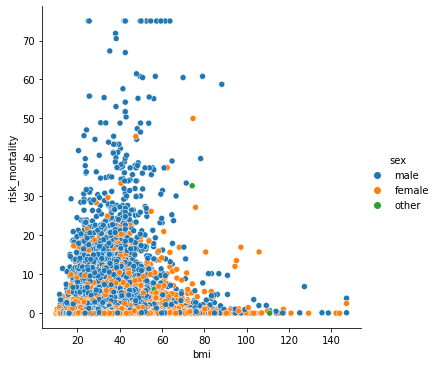

In [ ]:
bmi_mortality = data[['bmi','risk_mortality','sex','risk_infection','age','covid19_positive']]
bmi_mortality = bmi_mortality.dropna()
sns.relplot(x='bmi', y='risk_mortality', hue='sex', data=bmi_mortality)
column_1 = bmi_mortality["bmi"]

column_2 = bmi_mortality["risk_mortality"]

correlation = column_1.corr(column_2)
correlation

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


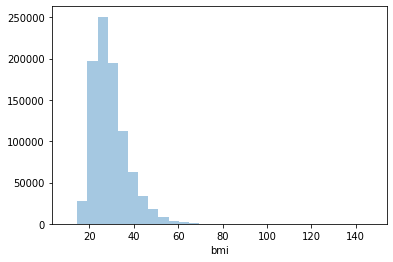

In [ ]:
sns.distplot(bmi_mortality['bmi'], kde=False, bins=30);

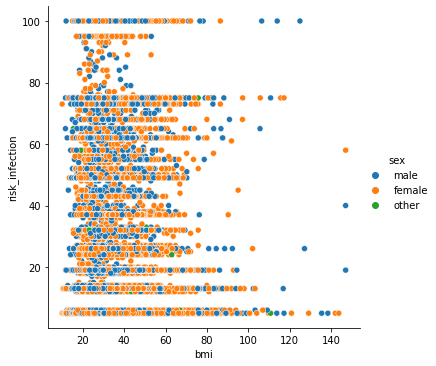

In [ ]:
sns.relplot(x='bmi', y='risk_infection', hue='sex', data=bmi_mortality)

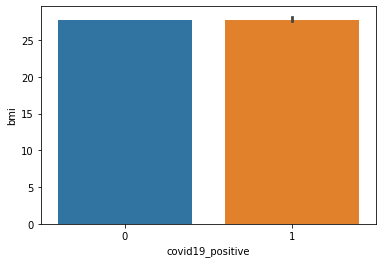

In [ ]:
from numpy import median
sns.barplot(x='covid19_positive', y='bmi', data=bmi_mortality, estimator=median)

**Insight:** BMI and covid19_positive has very low correlation of 0.083, so we can't infer relation between them


### Income Vs Covid-19


*   H0 = Income and Covid-19 are independent
*   H1 = They are related in some way



In [ ]:
data['income'].unique()

array([nan, 'low', 'med', 'high', 'gov', 'blank'], dtype=object)

In [ ]:
incomePosi = data[['income','covid19_positive']]
incomePosi.head()

,income,covid19_positive
ID,,
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0


In [ ]:
incomePosi.isnull().sum()

income              688743
covid19_positive         0
dtype: int64

In [ ]:
incomePosi = incomePosi.dropna()
incomePosi.head()

,income,covid19_positive
ID,,
47937,low,0
47938,med,0
47939,med,0
47940,high,0
47941,high,0


In [ ]:
cln,clp,cmn,cpm,chn,chp =0,0,0,0,0,0
for i in range(len(incomePosi['income'])):
  if (incomePosi[i:i+1]['income'].str.contains("low")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 0).bool()):
    cln+=1
  elif (incomePosi[i:i+1]['income'].str.contains("low")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 1).bool()):
    clp+=1
  elif (incomePosi[i:i+1]['income'].str.contains("med")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 0).bool()):
    cmn+=1
  elif (incomePosi[i:i+1]['income'].str.contains("med")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 1).bool()):
    cpm+=1
  elif (incomePosi[i:i+1]['income'].str.contains("high")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 0).bool()):
    chn+=1
  elif (incomePosi[i:i+1]['income'].str.contains("high")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 1).bool()):
    chp+=1
incomeMatrix = pd.DataFrame(
    [
        [cln,clp],
        [cmn,cpm],
        [chn,chp]
    ],
    index=["Low income","Med income","High income"],
    columns=["Covid19_Negative","Covid19_Positive"])
incomeMatrix

,Covid19_Negative,Covid19_Positive
Low income,22539,232
Med income,110428,1094
High income,77612,693


In [ ]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(incomeMatrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  0.054989533050271655
chi=5.801225, critical value=9.210340

At 0.01 level of significance, we accept the null hypotheses. 
They are independent.


In [ ]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(incomeMatrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.005223724470229346

### Insurance Vs Covid-19


*   H0 = Insurance and Covid-19 are independent
*   H1 = They are related in some way



In [ ]:
data['insurance'].unique()

array([nan, 'no', 'yes', 'blank'], dtype=object)

In [ ]:
insurPosi = data[['insurance','covid19_positive']]
insurPosi.head()

,insurance,covid19_positive
ID,,
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0


In [ ]:
insurPosi.isnull().sum()

insurance           688743
covid19_positive         0
dtype: int64

In [ ]:
insurPosi = insurPosi.dropna()
insurPosi.head()

,insurance,covid19_positive
ID,,
47937,no,0
47938,yes,0
47939,no,0
47940,yes,0
47941,yes,0


In [ ]:
cnn,cnp,cpn,cpp =0,0,0,0
for i in range(len(insurPosi['insurance'])):
  if (insurPosi[i:i+1]['insurance'].str.contains("no")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 0).bool()):
    cnn+=1
  elif (insurPosi[i:i+1]['insurance'].str.contains("no")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 1).bool()):
    cnp+=1
  elif (insurPosi[i:i+1]['insurance'].str.contains("yes")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 0).bool()):
    cpn+=1
  elif (insurPosi[i:i+1]['insurance'].str.contains("yes")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 1).bool()):
    cpp+=1
insurMatrix = pd.DataFrame(
    [
        [cnn,cnp],
        [cpn,cpp]
    ],
    index=["No insurance","Has insurance"],
    columns=["Covid19_Negative","Covid19_Positive"])
insurMatrix

,Covid19_Negative,Covid19_Positive
No insurance,45553,446
Has insurance,159434,1480


In [ ]:
chi2_contingency(insurMatrix)

(0.9103386540915883,
 0.3400245797942681,
 1,
 array([[ 45570.82934857,    428.17065143],
        [159416.17065143,   1497.82934857]]))

In [ ]:
df=chi2_contingency(insurMatrix)[3]
pd.DataFrame(
    data=df[:,:], 
    index=["No insurance","Has insurance"],
    columns=["Covid19_Negative","Covid19_Positive"]
).round(2)

,Covid19_Negative,Covid19_Positive
No insurance,45570.83,428.17
Has insurance,159416.17,1497.83


In [ ]:
chisquare=chi2_contingency(insurMatrix)[0]
chisquare

0.9103386540915883

In [ ]:
p_value = chi2_contingency(insurMatrix)[1]
p_value

0.3400245797942681

In [ ]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(insurMatrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  0.3400245797942681
chi=0.910339, critical value=6.634897

At 0.01 level of significance, we accept the null hypotheses. 
They are independent.


In [ ]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(insurMatrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.00209752720879171

### Sex Vs Covid-19


*   H0 = Sex and Covid-19 are independent
*   H1 = They are related in some way



In [ ]:
data['sex'].unique()

array(['male', 'female', 'other', 'undefined'], dtype=object)

In [ ]:
insurPosi = data[['sex','covid19_positive']]
insurPosi.head()

,sex,covid19_positive
ID,,
1,male,0
2,female,0
3,male,0
4,male,0
5,male,0


In [ ]:
insurPosi.isnull().sum()

sex                 0
covid19_positive    0
dtype: int64

In [ ]:
cmn,cpm,cfn,cfp =0,0,0,0
for i in range(len(insurPosi['sex'])):
  if (insurPosi[i:i+1]['sex'].str.contains("female")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 0).bool()):
    cfn+=1
  elif (insurPosi[i:i+1]['sex'].str.contains("female")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 1).bool()):
    cfp+=1
  elif (insurPosi[i:i+1]['sex'].str.contains("male")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 0).bool()):
    cmn+=1
  elif (insurPosi[i:i+1]['sex'].str.contains("male")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 1).bool()):
    cpm+=1
  
insurMatrix = pd.DataFrame(
    [
        [cmn,cpm],
        [cfn,cfp]
    ],
    index=["Male","Female"],
    columns=["Covid19_Negative","Covid19_Positive"])
insurMatrix

,Covid19_Negative,Covid19_Positive
Male,321238,1758
Female,585017,1587


In [ ]:
chi2_contingency(insurMatrix)

(425.262613661738,
 1.7457936909893287e-94,
 1,
 array([[321808.20138522,   1187.79861478],
        [584446.79861478,   2157.20138522]]))

In [ ]:
df=chi2_contingency(insurMatrix)[3]
pd.DataFrame(
    data=df[:,:], 
    index=["Male","Female"],
    columns=["Covid19_Negative","Covid19_Positive"]
).round(2)

,Covid19_Negative,Covid19_Positive
Male,321808.2,1187.8
Female,584446.8,2157.2


In [ ]:
chisquare=chi2_contingency(insurMatrix)[0]
chisquare

425.262613661738

In [ ]:
p_value = chi2_contingency(insurMatrix)[1]
p_value

1.7457936909893287e-94

In [ ]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(insurMatrix)
insurCramers_v

0.02162237405731346

In [ ]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(insurMatrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  1.7457936909893287e-94
chi=425.262614, critical value=6.634897

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


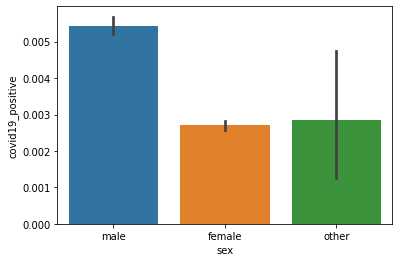

In [ ]:
sns.barplot(y='covid19_positive', x ='sex',data=bmi_mortality)

### Sex vs Covid risk/mortality

*   H0 = Sex and Risk mortality are independent
*   H1 = They are related in some way

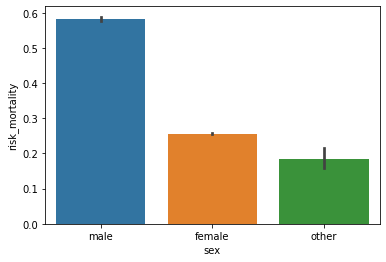

In [ ]:
sns.barplot(x='sex', y='risk_mortality', data=bmi_mortality)

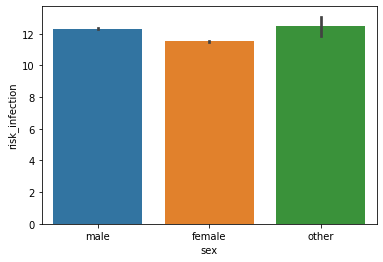

In [ ]:
sns.barplot(x='sex', y='risk_infection', data=bmi_mortality)

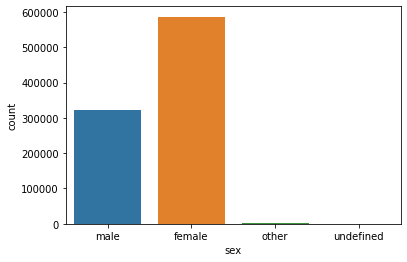

In [ ]:
sns.countplot(x='sex',data=data)

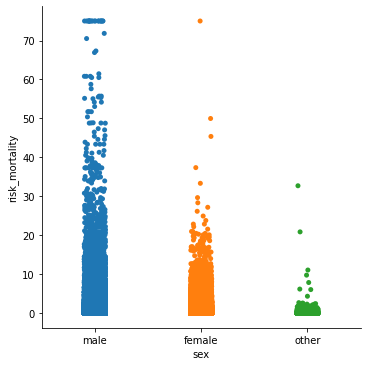

In [ ]:
sns.catplot(x="sex", y="risk_mortality", data=bmi_mortality)

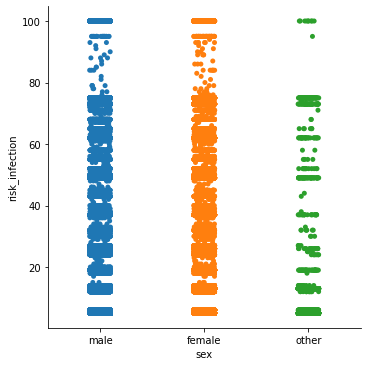

In [ ]:
sns.catplot(x="sex", y="risk_infection", data=bmi_mortality)

In [ ]:
stats.f_oneway(bmi_mortality['risk_infection'][bmi_mortality['sex'] == 'male'],
               bmi_mortality['risk_infection'][bmi_mortality['sex'] == 'female'],
               bmi_mortality['risk_infection'][bmi_mortality['sex'] == 'other'])

F_onewayResult(statistic=314.31011948544915, pvalue=3.4981118559002447e-137)

In [ ]:
stats.f_oneway(bmi_mortality['risk_mortality'][bmi_mortality['sex'] == 'male'],
               bmi_mortality['risk_mortality'][bmi_mortality['sex'] == 'female'],
               bmi_mortality['risk_mortality'][bmi_mortality['sex'] == 'other'])

F_onewayResult(statistic=10104.56778742565, pvalue=0.0)

**Insight:** Risk Mortality and Sex has very low p-value<'0.01', so we reject null hypothesis that they are independent.

Risk Mortality and Sex has very low p-value<'0.01', so we reject null hypothesis that they are independent.

### Contacts count Vs Covid-19


*   H0 = Contacts count and Covid-19 are independent
*   H1 = They are related in some way



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


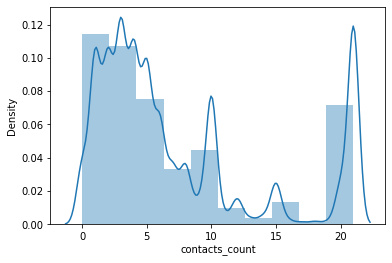

In [ ]:
sns.distplot(data['contacts_count'],bins=10)

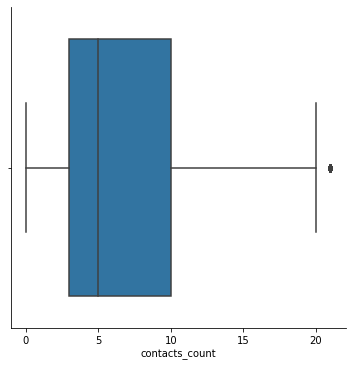

In [ ]:
sns.catplot(x='contacts_count',kind='box',data=data)

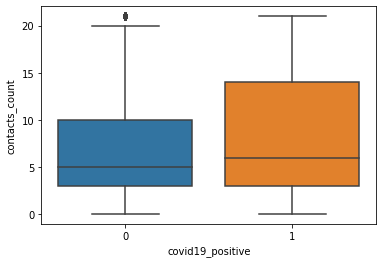

In [ ]:
df = data[["contacts_count","covid19_positive"]]
df=df.dropna()
sns.boxplot(x ='covid19_positive', y ='contacts_count', data = df) 

In [ ]:
confusion_matrix = pd.crosstab(df['covid19_positive'], df['contacts_count'])
confusion_matrix

contacts_count,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
covid19_positive,,,,,,,,,,,,,,,,,,,,,,
0,33114,94550,89937,108674,95232,86631,57054,30747,32553,11100,73625,4676,14439,3212,4314,23596,2208,1287,1652,1500,21303,113809
1,133,261,271,300,325,343,184,85,123,50,313,14,57,19,18,91,18,1,9,20,193,480


In [ ]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(confusion_matrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  9.537846249159013e-55
chi=317.281434, critical value=38.932173

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


In [ ]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(confusion_matrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.01868765658265211

### Age Vs Covid-19


*   H0 = Age and Covid-19 are independent
*   H1 = They are related in some way



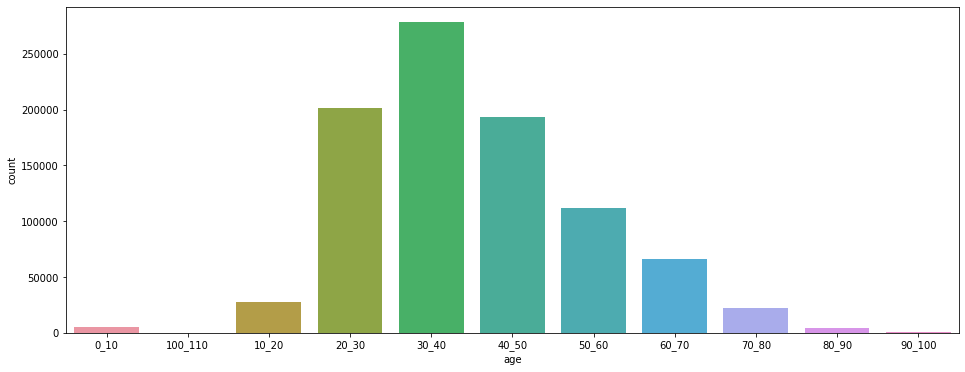

In [ ]:
df = data[["covid19_positive","age"]]
df=df.dropna()
df = df.sort_values('age')
plt.figure(figsize=(16, 6))
sns.countplot(x='age',data=df)

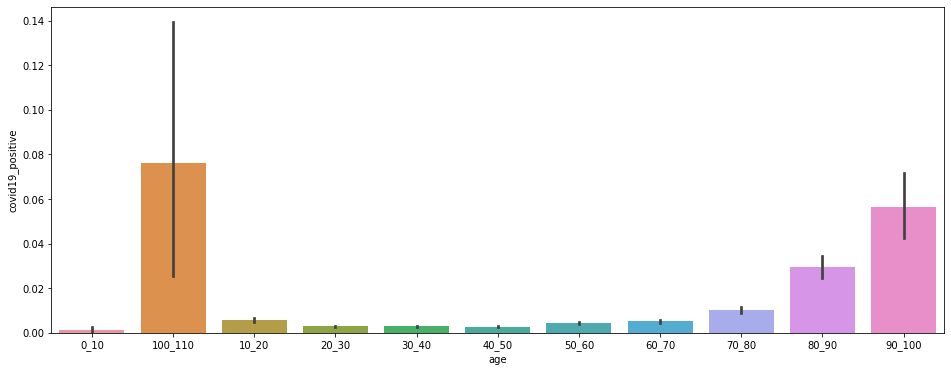

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x ='age', y ='covid19_positive', data = df)

In [ ]:
confusion_matrix = pd.crosstab(df['covid19_positive'], df['age'])
confusion_matrix

age,0_10,100_110,10_20,20_30,30_40,40_50,50_60,60_70,70_80,80_90,90_100
covid19_positive,,,,,,,,,,,
0,5579,73,27561,200984,277466,193011,111512,65645,22327,4383,868
1,8,6,161,608,801,528,489,338,230,133,52


In [ ]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(confusion_matrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  0.0
chi=2110.120625, critical value=23.209251

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


In [ ]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(confusion_matrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.04808112577083457

### Blood type Vs Covid-19


*   H0 = Blood type and Covid-19 are independent
*   H1 = They are related in some way



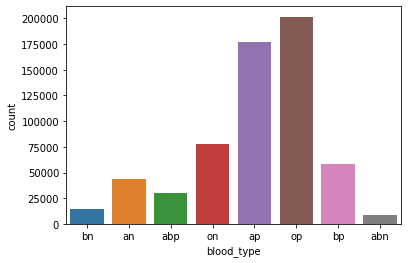

In [ ]:
df = data[["covid19_positive","blood_type"]]
df=df.dropna()
df = df[df["blood_type"] != "unknown"]
df = df[df["blood_type"] != "undefined"]
sns.countplot(x='blood_type',data=df)

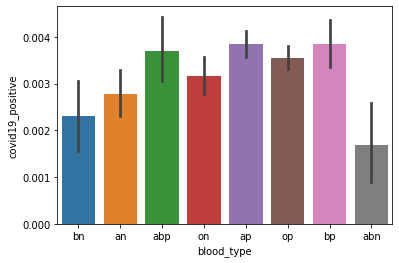

In [ ]:
sns.barplot(x ='blood_type', y ='covid19_positive', data = df)

In [ ]:
confusion_matrix = pd.crosstab(df['covid19_positive'], df['blood_type'])
confusion_matrix

blood_type,abn,abp,an,ap,bn,bp,on,op
covid19_positive,,,,,,,,
0,8902,30361,44007,176100,14701,58523,77741,200859
1,15,113,123,680,34,226,247,717


In [ ]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(confusion_matrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  4.25816213574962e-05
chi=31.889247, critical value=18.475307

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


In [ ]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(confusion_matrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.007210548491075127

### Working Vs Covid-19


*   H0 = Working and Covid-19 are independent
*   H1 = They are related in some way



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


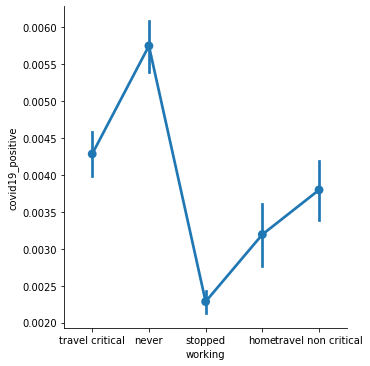

In [ ]:
df = data[["working","covid19_positive"]]
df=df.dropna()
sns.factorplot(x ="working", y ="covid19_positive", data = df); 

In [ ]:
confusion_matrix = pd.crosstab(df['covid19_positive'], df['working'])
confusion_matrix

working,home,never,stopped,travel critical,travel non critical
covid19_positive,,,,,
0,66193,177287,363736,211389,86619
1,212,1024,833,909,330


In [ ]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(confusion_matrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  8.227975223320316e-92
chi=430.212116, critical value=13.276704

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


In [ ]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(confusion_matrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. \nIt is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. 
It is based on Pearson's chi-squared statistic


0.021760616953383376

## Model building

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912768 entries, 1 to 912768
Data columns (total 60 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   survey_date                                  912768 non-null  object 
 1   region                                       154345 non-null  object 
 2   country                                      912666 non-null  object 
 3   ip_latitude                                  912768 non-null  float64
 4   ip_longitude                                 912768 non-null  float64
 5   ip_accuracy                                  912756 non-null  float64
 6   sex                                          912768 non-null  object 
 7   age                                          912763 non-null  object 
 8   height                                       912768 non-null  object 
 9   weight                                       912768 non-nul

Selecting features

In [ ]:
df1 = data[['sex', 'age', 'bmi', 'blood_type',
       'insurance', 'income', 'race', 'immigrant', 'smoking', 'alcohol',
       'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'rate_reducing_risk_single_social_distancing',
       'rate_reducing_risk_single_washing_hands',
       'rate_reducing_risk_house_social_distancing',
       'rate_reducing_risk_house_washing_hands',
       'rate_reducing_risk_single_sanitizer', 'rate_reducing_mask',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diabetes', 'hiv_positive', 'hypertension', 'other_chronic',
       'nursing_home', 'health_worker',
       'opinion_infection', 'opinion_mortality', 'risk_infection',
       'risk_mortality']]

Since dataset is fairly large (~ 1 Million) we can drop all rows which has null values.

In [ ]:
df1 = df1.dropna() #dropping null values

Encoding categorical data for regression models

In [ ]:
df = pd.get_dummies(df1,columns=['sex', 'age','blood_type',
       'insurance', 'income', 'race', 'immigrant', 'smoking', 'working'],drop_first=True)
df.head()

,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,worried,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,opinion_infection,opinion_mortality,risk_infection,risk_mortality,sex_male,sex_other,age_100_110,age_10_20,age_20_30,age_30_40,age_40_50,age_50_60,age_60_70,age_70_80,age_80_90,age_90_100,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,insurance_no,insurance_yes,income_gov,income_high,income_low,income_med,race_black,race_blank,race_hispanic,race_mixed,race_other,race_white,immigrant_immigrant,immigrant_native,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_never,working_stopped,working_travel critical,working_travel non critical
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
47938,25.2,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,0,1,1,1,1,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,55.0,25.0,5.0,0.059,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
47939,23.2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,4.0,0.0,4.0,1,1,1,1,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.0,45.0,5.0,0.062,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
47940,32.8,11.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3.0,0.0,3.0,1,1,1,0,-2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.0,25.0,5.0,0.129,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
47941,37.8,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,2.0,0.0,4.0,1,1,1,1,1,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,55.0,55.0,6.0,0.118,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
47945,35.5,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,3.0,0.0,2.0,1,1,1,1,0,4.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,25.0,5.0,6.0,0.559,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,worried,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,opinion_infection,opinion_mortality,risk_infection,risk_mortality,sex_male,sex_other,age_100_110,age_10_20,age_20_30,age_30_40,age_40_50,age_50_60,age_60_70,age_70_80,age_80_90,age_90_100,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,insurance_no,insurance_yes,income_gov,income_high,income_low,income_med,race_black,race_blank,race_hispanic,race_mixed,race_other,race_white,immigrant_immigrant,immigrant_native,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_never,working_stopped,working_travel critical,working_travel non critical
count,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.00000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000
mean,28.593955,3.362605,4.666019,-0.716171,-0.703948,-0.789673,-0.792881,7.171061,2.976528,0.200680,3.465144,0.998372,1.06874,0.825781,0.891556,0.457636,3.587535,0.018661,0.044320,0.146349,0.003693,0.006682,0.057660,0.014652,0.016985,0.052727,0.005370,0.133447,0.075519,0.002211,0.070295,33.385858,19.841696,13.107592,0.366113,0.443907,0.006050,0.000121,0.029571,0.198542,0.303025,0.228939,0.135439,0.077269,0.023278,0.002017,0.000316,0.032341,0.045851,0.200680,0.017179,0.065508,0.081861,0.236958,0.311092,0.192881,0.742364,0.025343,0.283635,0.140469,0.519742,0.017616,0.045001,0.059191,0.047309,0.010327,0.789868,0.079553,0.914737,0.064439,0.085943,0.080379,0.068837,0.014506,0.056445,0.065800,0.264658,0.359033,0.170915,0.101810
std,7.407103,4.349344,9.956418,1.880716,1.190722,0.604197,0.595877,6.346282,1.499747,1.244003,0.853352,0.653380,0.61423,0.748374,0.697454,1.039658,1.157993,0.135327,0.205808,0.353460,0.060661,0.081471,0.233102,0.120157,0.129215,0.223492,0.073084,0.340061,0.264231,0.046971,0.255647,23.156779,21.357809,16.977553,0.880807,0.496850,0.077549,0.011022,0.169403,0.398907,0.459572,0.420155,0.342196,0.267021,0.150786,0.044864,0.017770,0.176907,0.209165,0.400514,0.129939,0.247424,0.274157,0.425221,0.462946,0.394565,0.437338,0.157167,0.450767,0.347477,0.499616,0.131554,0.207308,0.235984,0.212301,0.101096,0.407407,0.270603,0.279276,0.245537,0.280284,0.271882,0.253180,0.119566,0.230782,0.247935,0.441156,0.479723,0.376439,0.302402
min,10.500000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.00000

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.columns.tolist()

['bmi',
 'alcohol',
 'cannabis',
 'amphetamines',
 'cocaine',
 'lsd',
 'mdma',
 'contacts_count',
 'house_count',
 'public_transport_count',
 'worried',
 'rate_reducing_risk_single_social_distancing',
 'rate_reducing_risk_single_washing_hands',
 'rate_reducing_risk_house_social_distancing',
 'rate_reducing_risk_house_washing_hands',
 'rate_reducing_risk_single_sanitizer',
 'rate_reducing_mask',
 'covid19_symptoms',
 'covid19_contact',
 'asthma',
 'kidney_disease',
 'liver_disease',
 'compromised_immune',
 'heart_disease',
 'lung_disease',
 'diabetes',
 'hiv_positive',
 'hypertension',
 'other_chronic',
 'nursing_home',
 'health_worker',
 'opinion_infection',
 'opinion_mortality',
 'risk_infection',
 'risk_mortality',
 'sex_male',
 'sex_other',
 'age_100_110',
 'age_10_20',
 'age_20_30',
 'age_30_40',
 'age_40_50',
 'age_50_60',
 'age_60_70',
 'age_70_80',
 'age_80_90',
 'age_90_100',
 'blood_type_abp',
 'blood_type_an',
 'blood_type_ap',
 'blood_type_bn',
 'blood_type_bp',
 'blood_type

[Text(0.5, 0, 'bmi'),
 Text(1.5, 0, 'alcohol'),
 Text(2.5, 0, 'cannabis'),
 Text(3.5, 0, 'amphetamines'),
 Text(4.5, 0, 'cocaine'),
 Text(5.5, 0, 'lsd'),
 Text(6.5, 0, 'mdma'),
 Text(7.5, 0, 'contacts_count'),
 Text(8.5, 0, 'house_count'),
 Text(9.5, 0, 'public_transport_count'),
 Text(10.5, 0, 'worried'),
 Text(11.5, 0, 'rate_reducing_risk_single_social_distancing'),
 Text(12.5, 0, 'rate_reducing_risk_single_washing_hands'),
 Text(13.5, 0, 'rate_reducing_risk_house_social_distancing'),
 Text(14.5, 0, 'rate_reducing_risk_house_washing_hands'),
 Text(15.5, 0, 'rate_reducing_risk_single_sanitizer'),
 Text(16.5, 0, 'rate_reducing_mask'),
 Text(17.5, 0, 'covid19_symptoms'),
 Text(18.5, 0, 'covid19_contact'),
 Text(19.5, 0, 'asthma'),
 Text(20.5, 0, 'kidney_disease'),
 Text(21.5, 0, 'liver_disease'),
 Text(22.5, 0, 'compromised_immune'),
 Text(23.5, 0, 'heart_disease'),
 Text(24.5, 0, 'lung_disease'),
 Text(25.5, 0, 'diabetes'),
 Text(26.5, 0, 'hiv_positive'),
 Text(27.5, 0, 'hypertension')

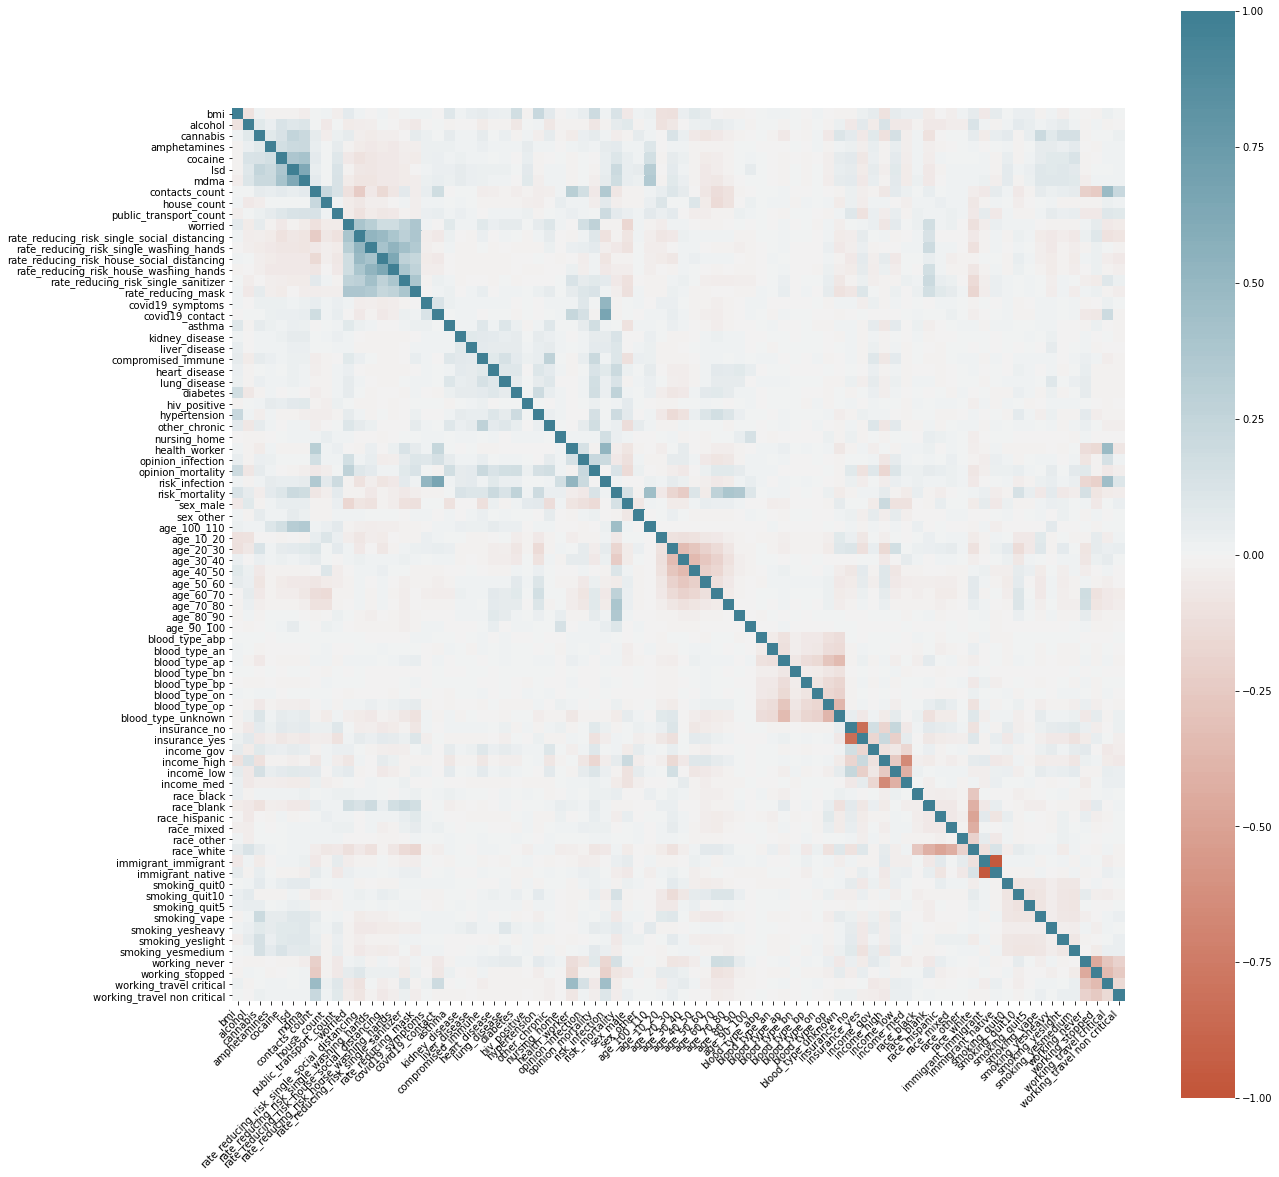

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
corr['risk_infection'].sort_values(ascending=False)

risk_infection                                 1.000000
covid19_contact                                0.662996
health_worker                                  0.530407
covid19_symptoms                               0.510146
working_travel critical                        0.439393
contacts_count                                 0.357054
opinion_infection                              0.206951
public_transport_count                         0.188528
nursing_home                                   0.157233
working_travel non critical                    0.106558
heart_disease                                  0.082024
house_count                                    0.071523
liver_disease                                  0.068450
rate_reducing_risk_single_sanitizer            0.063733
age_20_30                                      0.061934
kidney_disease                                 0.061831
mdma                                           0.055119
amphetamines                                   0

From the correlation values, we can see that there is varying extent to which the independent variables are correlated with the target. Lower correlation means weak linear relationship but there may be a strong non-linear relationship so, we can’t pass any judgement at this level.

In [ ]:
df['ID'] = range(1, len(df) + 1)

After dropping rows with null values we have to do reindexing of rows

In [ ]:
df.index = df['ID']

In [ ]:
df = df.drop(['ID'], axis=1)

In [ ]:
df.tail()

,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,worried,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,opinion_infection,opinion_mortality,risk_infection,risk_mortality,sex_male,sex_other,age_100_110,age_10_20,age_20_30,age_30_40,age_40_50,age_50_60,age_60_70,age_70_80,age_80_90,age_90_100,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,insurance_no,insurance_yes,income_gov,income_high,income_low,income_med,race_black,race_blank,race_hispanic,race_mixed,race_other,race_white,immigrant_immigrant,immigrant_native,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_never,working_stopped,working_travel critical,working_travel non critical
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41151,42.2,2.0,2.0,-1.0,-1.0,-1.0,-1.0,10.0,3.0,0.0,4.0,-1,1,1,1,0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35.0,55.0,5.0,0.116,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
41152,27.7,1.0,27.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,4.0,1,1,1,1,1,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.0,25.0,13.0,0.050,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
41153,42.2,0.0,28.0,-1.0,0.0,0.0,0.0,2.0,3.0,0.0,4.0,2,2,2,2,2,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,65.0,25.0,5.0,0.056,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
41154,23.9,12.0,12.0,-1.0,-1.0,-1.0,-1.0,18.0,3.0,0.0,2.0,0,1,0,1,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,5.0,13.0,0.964,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
41155,27.5,8.0,13.0,-1.0,-1.0,-1.0,-1.0,12.0,2.0,0.0,4.0,0,1,1,1,2,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.0,5.0,13.0,0.050,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


Setting risk_infection as target variable y

In [ ]:
X = df.drop(['risk_infection'], axis = 1)
y = df['risk_infection']

Train-test split with 30% test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


**Selecting the features for linear regression**

With backward elimination, deselect features that have p_values > 0.05 which is interpreted as a failure to explain the change in the target other than chance. The following code returns only the selected features with p_values < 0.05.

In [ ]:
# Linear Regression
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['bmi', 'cannabis', 'amphetamines', 'lsd', 'house_count', 'public_transport_count', 'rate_reducing_risk_house_social_distancing', 'rate_reducing_risk_house_washing_hands', 'rate_reducing_mask', 'covid19_symptoms', 'covid19_contact', 'kidney_disease', 'liver_disease', 'heart_disease', 'lung_disease', 'diabetes', 'nursing_home', 'health_worker', 'opinion_infection', 'opinion_mortality', 'risk_mortality', 'sex_male', 'age_10_20', 'age_20_30', 'age_30_40', 'age_50_60', 'age_60_70', 'age_80_90', 'age_90_100', 'blood_type_ap', 'blood_type_bp', 'insurance_yes', 'income_low', 'race_blank', 'race_hispanic', 'race_mixed', 'race_other', 'race_white', 'smoking_yesheavy', 'smoking_yeslight', 'working_travel critical', 'working_travel non critical']


In [ ]:
print(model.pvalues)

const                                         3.133229e-105
bmi                                            1.291895e-02
cannabis                                       1.386698e-02
amphetamines                                   3.397303e-05
lsd                                            5.280891e-07
house_count                                    2.140660e-68
public_transport_count                         0.000000e+00
rate_reducing_risk_house_social_distancing     1.141459e-03
rate_reducing_risk_house_washing_hands         2.324026e-02
rate_reducing_mask                             2.804496e-02
covid19_symptoms                               0.000000e+00
covid19_contact                                0.000000e+00
kidney_disease                                 2.866702e-85
liver_disease                                 2.080111e-122
heart_disease                                  0.000000e+00
lung_disease                                   3.833513e-20
diabetes                                

### Hyperparameter Tuning using GridsearchCV(Cross validations)

In [ ]:
# Decision Tree
tuned_parameters = [{'max_depth': [1,2,3,4,5,10, 15, 20, 25, 50, 100,200]}]
MSE_dt = ['mean_squared_error(y_test,y_pred4)']
for value in MSE_dt:
    regressor_dt = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=4)
    regressor_dt.fit(X_train, y_train)
    y_true, y_pred4 = y_test, regressor_dt.predict(X_test)
    
print('The optimum max_depth for Decision Tree is: ', regressor_dt.best_params_ )

The optimum max_depth for Decision Tree is:  {'max_depth': 10}


In [ ]:
# Random Forests 
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]

MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred5 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)

The best hyper-parameters for Random Forests are:  {'max_depth': 10, 'n_estimators': 200}


When we have features with values at different scales, it is very important to standardize them to the same range so that the algorithm does not weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. This is crucial for distance-based algorithms such as KNN, SVM, Linear Regression, etc. 

We choose RobustScaler for scaling as it is based on percentiles and hence not easily influenced by outliers.

In [ ]:
scaler = preprocessing.RobustScaler() # Features Scaling is required for distance-based algorithms
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# KNN
tuned_parameters = [{'n_neighbors': [1,2,3,4,5,10,15,20], 'p': [1,2]}]

MSE_knn = ['mean_squared_error(y_test,y_pred)']
for i in MSE_knn:
    model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=4)
    model.fit(X_train_scaled, y_train)
    y_true, y_pred6 = y_test, model.predict(X_test_scaled)
    
print('The best hyper-parameters for KNN are: ', model.best_params_)

The best hyper-parameters for KNN are:  {'n_neighbors': 10, 'p': 1}


I tried to do hyperparameter tuning for SVM model but since SVM has more hyperparameters than others and also more computationally intensive so I couldn't do hyperparameter tuning and performance of model was also poor.

In [ ]:
# SVM
# tuned_parameters = [{'kernel': ['linear', 'rbf', 'poly'], 'C':[1, 2, 3, 5, 6, 7, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}]

# MSE_svm = ['mean_squared_error(y_test,y_pred7)']
# for value in MSE_svm:
#     svr_regr = GridSearchCV(SVR(), tuned_parameters, cv=4)
#     svr_regr.fit(X_train_scaled, y_train)
#     y_true, y_pred7 = y_test, svr_regr.predict(X_test_scaled)
    
# print('The best hyper-parameters for SVR are: ', svr_regr.best_params_)

In [ ]:
# XGboost
tuned_parameters = [{'max_depth': [5,10, 15, 20, 25, 30],'learning_rate':[0.001, 0.01, 0.1, 0.5], 'n_estimators': [100,150,200, 250, 300]}]
MSE_xgb = ['mean_squared_error(y_test,y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRegressor(silent = True), tuned_parameters, cv=4)
    regr.fit(X_train, y_train)
    y_true, y_pred2 = y_test, regr.predict(X_test)
    
print('The best hyper-parameters for XGBBoost are: ',regr.best_params_)

The best hyper-parameters for XGBBoost are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
# AdaBoost
tuned_parameters = [{'learning_rate': [0.1,1,2,3,4,5], 'n_estimators': [100,200,300, 400, 500]}]
MSE_ada = ['mean_squared_error(y_test,y_pred3)']
for value in MSE_ada:
    adaregr = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
    adaregr.fit(X_train, y_train)
    y_true, y_pred3 = y_test, adaregr.predict(X_test)
    
print('The best hyper-parameters for AdaBoost are: ', adaregr.best_params_ )

The best hyper-parameters for AdaBoost are:  {'learning_rate': 0.1, 'n_estimators': 500}


## Training and evaluating the models

In [ ]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=0, max_depth = 10)
regressor_dt.fit(X_train,y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=10, random_state=0,
                             n_estimators=200)
regr_rf.fit(X_train, y_train)

# KNN
neigh = KNeighborsRegressor(n_neighbors = 10, metric = 'minkowski', p = 1)
neigh.fit(X_train_scaled, y_train)

# XGBoost
regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state = 0, silent = True)
regr.fit(X_train, y_train)

# AdaBoost
adaregr = AdaBoostRegressor(random_state=0, learning_rate = 0.1, n_estimators=500)
adaregr.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=500, random_state=0)

In [ ]:
y_pred1 = regressor.predict(X_test_scaled)    # Linear regression
y_pred2 = regressor_dt.predict(X_test)        # Decision Tree
y_pred3 = regr_rf.predict(X_test)             # Random Forests
y_pred4 = neigh.predict(X_test_scaled)        # KNN
y_pred5 = regr.predict(X_test)                # XGBoost
y_pred6 = adaregr.predict(X_test)             # AdaBoost

In [ ]:
print('The R^2 value for Linear Regression is        :', round((r2_score(y_test,y_pred1)), 3))
print('The R^2 value for Decision Tree Regressor is  :', round((r2_score(y_test,y_pred2)), 3))
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_pred3)), 3))
print('The R^2 value for KNN Regressor is            :', round((r2_score(y_test,y_pred4)), 3))
print('The R^2 value for XGBoost Regressor is        :', round((r2_score(y_test,y_pred5)), 3))
print('The R^2 value for AdaBoost Regressor is       :', round((r2_score(y_test,y_pred6)), 3))

The R^2 value for Linear Regression is        : 0.885
The R^2 value for Decision Tree Regressor is  : 0.92
The R^2 value for Random Forests Regressor is : 0.93
The R^2 value for KNN Regressor is            : 0.35
The R^2 value for XGBoost Regressor is        : 0.933
The R^2 value for AdaBoost Regressor is       : 0.663


In [ ]:
print('The Adj R2 value for Linear Regression is        :', round((1 - (1-r2_score(y_test,y_pred1))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Decision Tree Regressor is  :', round((1 - (1-r2_score(y_test,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Random Forests Regressor is :', round((1 - (1-r2_score(y_test,y_pred3))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for KNN Regressor is            :', round((1 - (1-r2_score(y_test,y_pred4))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for XGBoost Regressor is        :', round((1 - (1-r2_score(y_test,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for AdaBoost Regressor is       :', round((1 - (1-r2_score(y_test,y_pred6))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))

The Adj R2 value for Linear Regression is        : 0.885
The Adj R2 value for Decision Tree Regressor is  : 0.92
The Adj R2 value for Random Forests Regressor is : 0.93
The Adj R2 value for KNN Regressor is            : 0.349
The Adj R2 value for XGBoost Regressor is        : 0.932
The Adj R2 value for AdaBoost Regressor is       : 0.663


In [ ]:
MSE_lr  = mean_squared_error(y_test,y_pred1)
MSE_dt  = mean_squared_error(y_test,y_pred2)
MSE_rf  = mean_squared_error(y_test,y_pred3)
MSE_knn = mean_squared_error(y_test,y_pred4)
MSE_xgb = mean_squared_error(y_test,y_pred5)
MSE_ada = mean_squared_error(y_test,y_pred6)

In [ ]:
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));
print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));
print('The RMSE value for KNN Regressor is            :', round(np.sqrt(MSE_knn)));
print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
print('The RMSE value for AdaBoost Regressor is       :', round(np.sqrt(MSE_ada)));

The RMSE value for Linear Regression is        : 6.0
The RMSE value for Decision Tree Regressor is  : 5.0
The RMSE value for Random Forests Regressor is : 5.0
The RMSE value for KNN Regressor is            : 14.0
The RMSE value for XGBoost Regressor is        : 4.0
The RMSE value for AdaBoost Regressor is       : 10.0


DT: 0.918228 (0.040159)
XGB: 0.930013 (0.040738)
ADA: 0.342305 (0.165354)
RF: 0.927163 (0.040646)
LR: 0.883194 (0.032461)
KNN: 0.329658 (0.040847)


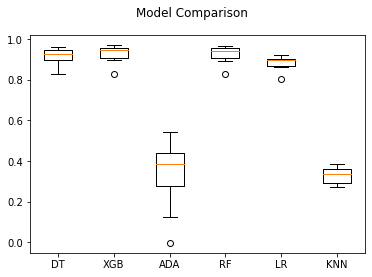

In [64]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DT', regressor_dt))
models.append(('XGB', regr))
models.append(('ADA', adaregr))
models.append(('RF', regr_rf))

scaled_models = []
scaled_models.append(('LR', regressor))
scaled_models.append(('KNN', neigh))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

for name, model in scaled_models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_test_scaled, y_test, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg1 = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg1)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Calculating statistical significance XGBoost and Random Forest using 5 by 2 CV using MLxtend package

In [71]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=regr,
                              estimator2=regr_rf,
                              X=X_test, y=y_test,scoring='r2', 
                              random_seed=1)

# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')


The P-value is = 0.587
The t-statistics is = 0.581
Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.


Therefore, performance of XGBoost and Random forest is not statistical significant and we can use any of both models

**So, on the basis of Adj-R^2, RMSE and k-fold test we can conclude that we can select XGBoost Model for predicting Covid-19 risk infection.**